# GRIP TASK 2 (Clustering)
## Author - Shiva Prasad Gadidasu P
## The Sparks Foundation


### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Importing modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_rows = 150

## Loading CSV and Data Inspection

In [2]:
iris_df = pd.read_csv('https://github.com/GPShiva/Sparks-Internship/blob/main/Iris.csv?raw=true',index_col = 'Id')
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [4]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Checking for null values

In [6]:
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### INSIGHT
- No `Null` values.
- No need of any datatype conversions.
- Every species category have equal number of data points. Thus, the dataset is not biased

## EDA
### CHECKING FOR OUTLIERS

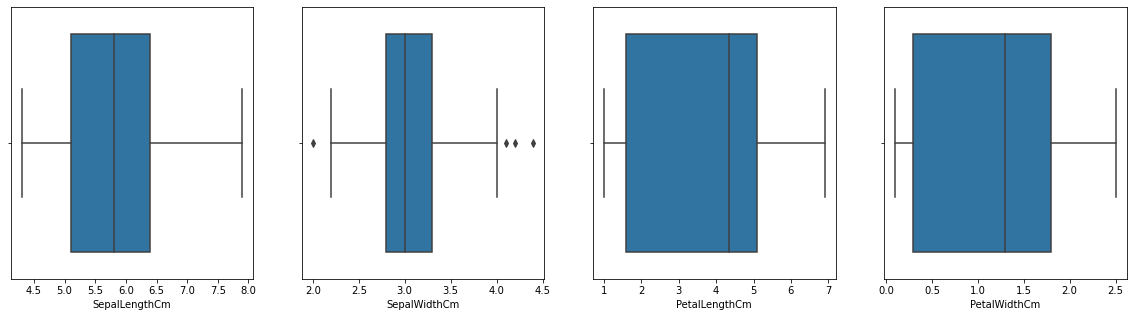

In [7]:
plt.figure(figsize=(20,5))
j = 1
for i in iris_df.iloc[:,:-1].columns:
    plt.subplot(1,4,j)
    sns.boxplot(iris_df[i])
    j+=1

### INSIGHT
- Only `SepalWidthCm` is having outliers.
- All other are not having any outliers.

### Checking the distribution

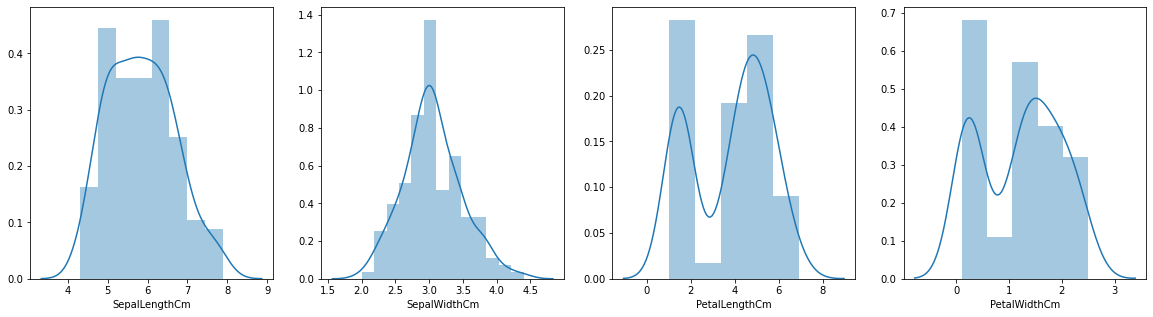

In [8]:
plt.figure(figsize=(20,5))
j = 1
for i in iris_df.iloc[:,:-1].columns:
    plt.subplot(1,4,j)
    sns.distplot(iris_df[i])
    j+=1

### INSIGHT
- `SepalLengthCm`, `SepalWidthCm` are following `Normal Distribution`.
- `PetalLengthCm`, `PetalWidthCm` are not following `Normal Distribution`. Thus, maybe much helpful when compared to other two in clustering.

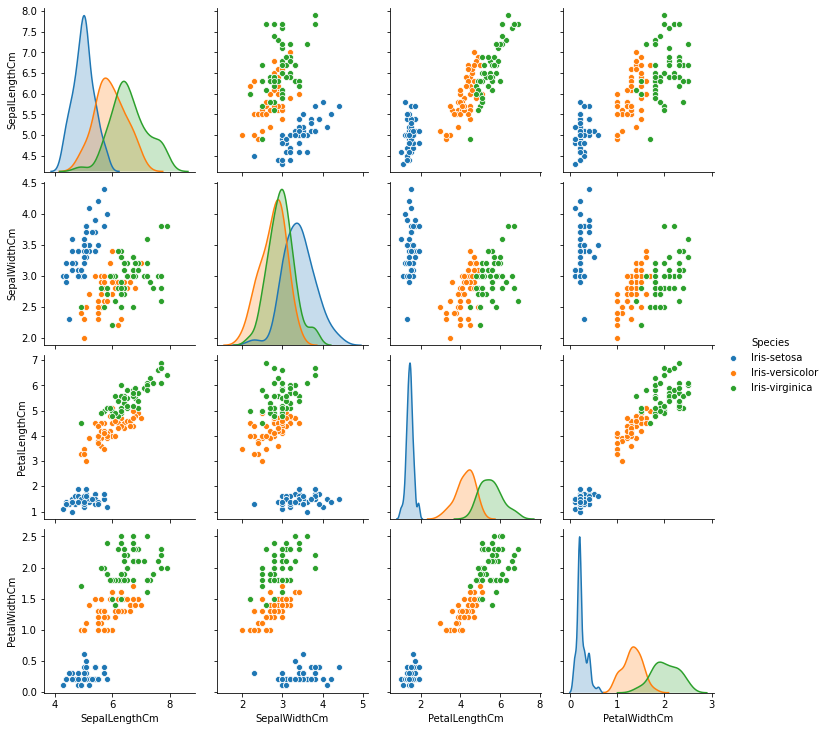

In [9]:
sns.pairplot(iris_df,hue='Species')
plt.show()

### INSIGHT
- `PetalLengthCm`, `PetalWidthCm` columns are much more segmented between species when compared to other two.
- In `scatter plot` between `SepalWidthCm` and `SepalLenthCm`, we cannot draw a border line between Species `versicolor` and `virginica`
- Remaining plots look promising.

## Data Preprocessing
### Removing `Cluster` column from the dataset for model building

In [10]:
iris_cluster = iris_df.iloc[:,:-1].values
iris_cluster

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## MODEL BUILDING
### Elbow method

In [11]:
from sklearn.cluster import KMeans
wcss = [] # Within-Cluster-Sum-of-Squares 
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 100)
  kmeans.fit(iris_cluster)
  wcss.append(kmeans.inertia_)

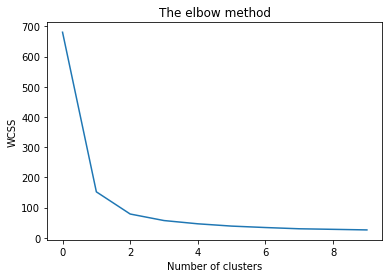

In [12]:
plt.plot(wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### INSIGHT
- Clearly, after the `Number of clusters = 3`, there is no significant drop in `Within-Cluster-Sum-of-Squares`
- Thus, the `optimal number of clusters` is `3`

## Using KMeans

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                 n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(iris_cluster)

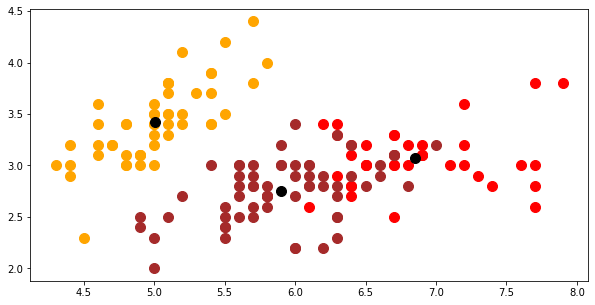

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(iris_cluster[y_kmeans == 0, 0], iris_cluster[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(iris_cluster[y_kmeans == 1, 0], iris_cluster[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(iris_cluster[y_kmeans == 2, 0], iris_cluster[y_kmeans == 2, 1],
            s = 100, c = 'brown', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.show()

In [15]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [16]:
pd.Series(y_kmeans).value_counts()

2    62
1    50
0    38
dtype: int64

In [17]:
y_pred = pd.DataFrame(iris_df.Species)

y_pred['KMeans_Prediction'] = pd.Series(y_kmeans,index = np.arange(1,len(iris_df.Species)+1))

y_pred.KMeans_Prediction = y_pred.KMeans_Prediction.astype('str')

# renaming 'Species' column according to KMeans_Prediction
for i in y_pred.KMeans_Prediction.unique():
    pred_value = y_pred.Species[y_pred.KMeans_Prediction == i].mode().values[0]
    y_pred.KMeans_Prediction.replace(i,pred_value,inplace=True)
    print('i',i,'pred', pred_value)
y_pred.head()

i 1 pred Iris-setosa
i 2 pred Iris-versicolor
i 0 pred Iris-virginica


,Species,KMeans_Prediction
Id,,
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
5,Iris-setosa,Iris-setosa


In [18]:
y_pred.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [19]:
((len(y_pred) - len(y_pred[y_pred.Species != y_pred.KMeans_Prediction]))/len(y_pred))*100

89.33333333333333

### CONCLUSION
- The model got `89.3%` of the predictions correct

In [20]:
iris_df_pred = iris_df.copy()
iris_df_pred['pred_value'] = y_pred.KMeans_Prediction

# model got 16 predictions wrong
iris_df_pred[iris_df_pred.Species != iris_df_pred.pred_value]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,pred_value
Id,,,,,,
53,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-virginica
78,6.7,3.0,5.0,1.7,Iris-versicolor,Iris-virginica
102,5.8,2.7,5.1,1.9,Iris-virginica,Iris-versicolor
107,4.9,2.5,4.5,1.7,Iris-virginica,Iris-versicolor
114,5.7,2.5,5.0,2.0,Iris-virginica,Iris-versicolor
115,5.8,2.8,5.1,2.4,Iris-virginica,Iris-versicolor
120,6.0,2.2,5.0,1.5,Iris-virginica,Iris-versicolor
122,5.6,2.8,4.9,2.0,Iris-virginica,Iris-versicolor
124,6.3,2.7,4.9,1.8,Iris-virginica,Iris-versicolor


### 3D Visualization

In [24]:
import plotly.express as px
px.scatter_3d(iris_df_pred, x = 'SepalLengthCm', y = 'SepalWidthCm', z = 'PetalWidthCm', size='PetalLengthCm', color='pred_value')

### 2D Visualization of the model

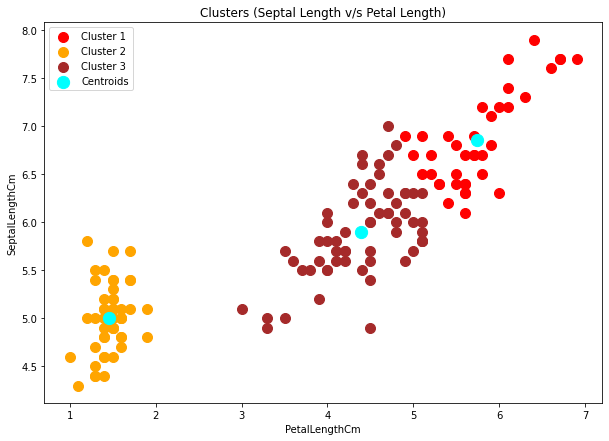

In [34]:
plt.figure(figsize = (10, 7))
plt.scatter(iris_df_pred.iloc[y_kmeans == 0, 2], iris_df_pred.iloc[y_kmeans == 0, 0], c = 'red', s = 100, label = "Cluster 1")
plt.scatter(iris_df_pred.iloc[y_kmeans == 1, 2], iris_df_pred.iloc[y_kmeans == 1, 0], c = 'orange', s = 100, label = "Cluster 2")
plt.scatter(iris_df_pred.iloc[y_kmeans == 2, 2], iris_df_pred.iloc[y_kmeans == 2, 0], c = 'brown', s = 100, label = "Cluster 3")
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 0], c = 'cyan', s = 150, label = 'Centroids')
plt.legend()
plt.xlabel('PetalLengthCm')
plt.ylabel('SeptalLengthCm')
plt.title('Clusters (Septal Length v/s Petal Length)')
plt.show()

## CONCLUSION
- Model is good in clustering out the Species.
- Model got `89.3%` of the predictions correct.